A very basic tutorial of image processing and computer vision using opencv and python

Before getting started make sure you have a working python ide and opencv package installed.

In [1]:
#importing the packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [3]:
#Reading image image in opencv
img = cv2.imread('checker.jpg',0) #0 indicates that the image will be read in grayscale
#Print the image data (pixel values) as a 2D numpy array. Each pixel value ranges from 0 - 255
print(img)

[[20 25 20 ... 16 16 16]
 [20 20 18 ... 16 16 16]
 [21 15 17 ... 16 16 16]
 ...
 [17 18 18 ... 24 24 24]
 [17 18 18 ... 27 27 27]
 [17 18 18 ... 30 30 30]]


In [5]:
#print the size of an image
print("Image Size is",img.shape)

#print data-type of image
print("Data type of image is", img.dtype)

Image Size is (350, 355)
Data type of image is uint8


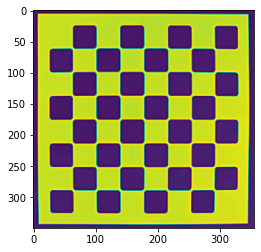

In [6]:
#Display the image using Matplotlib
plt.imshow(img)

So why the image is not displayed as grayscale? thats because matplotlib uses colormap to represent image data. By default matplotlib uses a different colormap (other than grayscale) to show the image, therefore, if you want to see the image in grayscale you need to provide the following argument

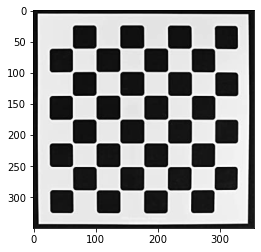

In [7]:
#set colormap to grayscale for rendering
plt.imshow(img, cmap='gray')

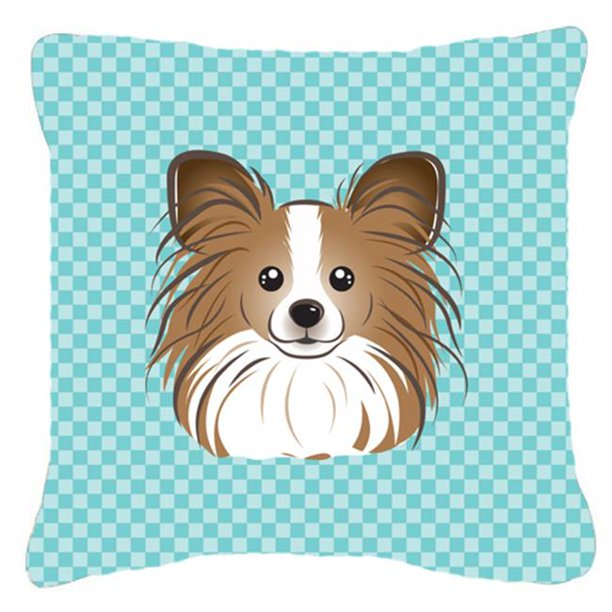

In [8]:
#you candirectly read and display an image using Image from IPython display
Image('puppy.jpeg')

In [10]:
#Read the image using opencv
p_img = cv2.imread("puppy.jpeg",1)

#print the size of image
print("Image size is", p_img.shape)

print("Data type is", p_img.dtype)

Image size is (612, 612, 3)
Data type is uint8


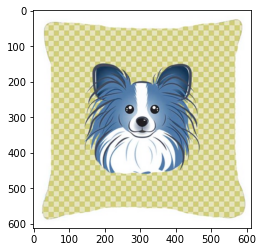

In [11]:
#Display the image 
plt.imshow(p_img)
# what happened? different color right

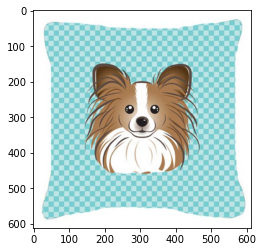

In [12]:
#The reason is that the opencv uses BGR format to store the image rather than RGB so matplotlib expects it to be RGB but opencv stores in BGR so to align it correctly
p_img_ch_rev = p_img[:,:,::-1]
#so now we have reversed the channel order to RGB lets visualize the image
plt.imshow(p_img_ch_rev)

Text(0.5, 1.0, 'Merged Output')

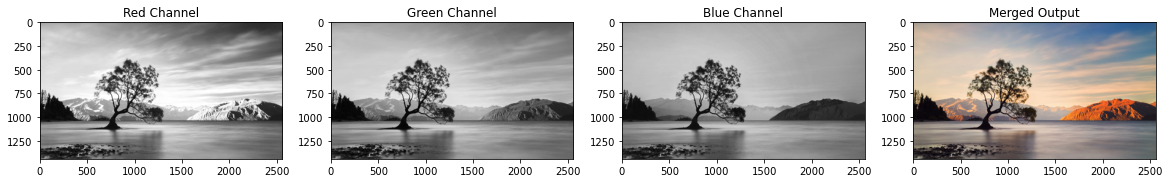

In [14]:
#Spliting and merging color channel
w_img = cv2.imread("wanaka.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(w_img) #cv2.split to split the color channels

#show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

#Merge the individual channels into a BGR image
imgMerged = cv2.merge( (b,g,r))
#show the merged output
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]); plt.title("Merged Output")

In [15]:
#Converting image to different color spaces
#Changing BGR to RGB
w_img_rgb = cv2.cvtColor(w_img, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Original')

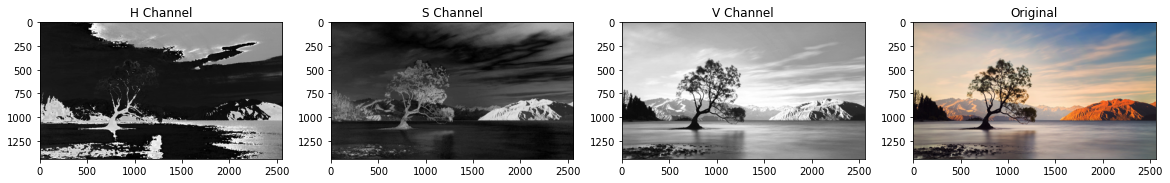

In [16]:
#Converting image to HSV
img_hsv = cv2.cvtColor(w_img, cv2.COLOR_BGR2HSV)
#split the image into hsv components
h,s,v = cv2.split(img_hsv)

#show hsv channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");

#show the original output
plt.subplot(144);plt.imshow(w_img_rgb); plt.title("Original")

Text(0.5, 1.0, 'Modified Image')

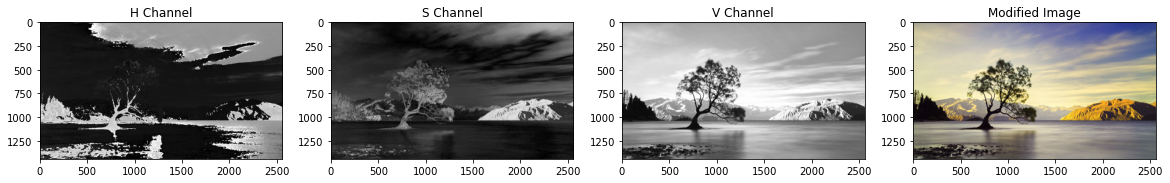

In [18]:
#Modifying individual channels
h_new = h+10
w_img_merged = cv2.merge((h_new, s, v))
w_img_rgb = cv2.cvtColor(w_img_merged, cv2.COLOR_HSV2RGB)


#show channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(w_img_rgb); plt.title("Modified Image")

In [19]:
#Saving image
cv2.imwrite('Wanaka_lake_saved.png', w_img_rgb)

True

In [21]:
#Basic Image Manipulation
#Accessing and changing individual pixels
#Image Resizing
#Cropping
#Flipping

[[20 25 20 ... 16 16 16]
 [20 20 18 ... 16 16 16]
 [21 15 17 ... 16 16 16]
 ...
 [17 18 18 ... 24 24 24]
 [17 18 18 ... 27 27 27]
 [17 18 18 ... 30 30 30]]


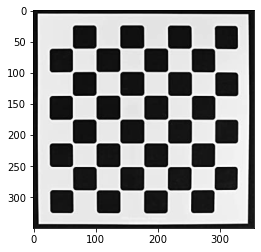

In [22]:
from PIL import Image
#Read image
img = cv2.imread("checker.jpg",0)
#set color map to grayscale for rendering
plt.imshow(img, cmap='gray')
print(img)

In [25]:
#accessing individual pixels. Consider image as matrix, so if you want to access the first element of the matrix you need to access matrix[0,0]. Lets us use the same convention
#print the first pixel of the image
print(img[0,0])
#Print a random pixel
print(img[20,20])
#Remember here the index is [column,row]

20
234


[[20 25 20 ... 16 16 16]
 [20 20 18 ... 16 16 16]
 [21 15 17 ... 16 16 16]
 ...
 [17 18 18 ... 24 24 24]
 [17 18 18 ... 27 27 27]
 [17 18 18 ... 30 30 30]]


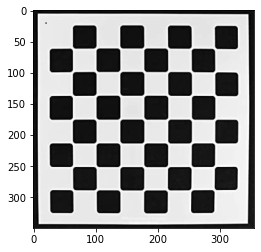

In [26]:
#so lets modify image pixels
img_copy = img.copy()
img_copy[20,20] = 0
img_copy[20,21] = 0
img_copy[21,20] = 0
img_copy[21,21] = 0

#alternatively you can write
#img_copy[20:21,20:21] = 0

plt.imshow(img_copy, cmap='gray')
print(img_copy)

In [27]:
#visualize the topleft corner you will see a tiny black square which was not present before


(1440, 2560, 3)


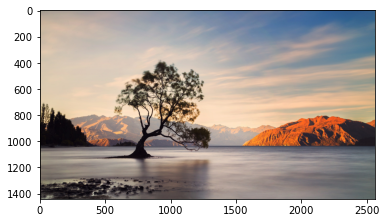

In [30]:
#Cropping image
w_img = cv2.imread("wanaka.jpg", cv2.IMREAD_COLOR)
w_img_rgb = w_img[:,:,::-1]
plt.imshow(w_img_rgb)
print(w_img_rgb.shape)

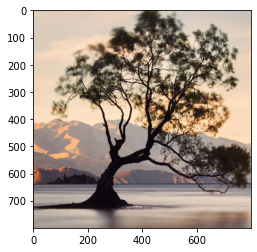

In [38]:
#crop out a specific region
crop_img = w_img_rgb[400:1200, 500:1300]
plt.imshow(crop_img)

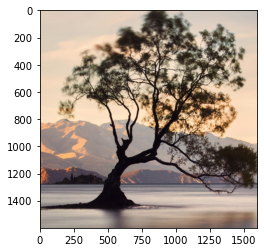

In [39]:
#Resizing the image
#specifying scale factor using fx and fy. fx and fy are the scaling factors
resize_crop_img = cv2.resize(crop_img, None, fx=2, fy=2)
plt.imshow(resize_crop_img)

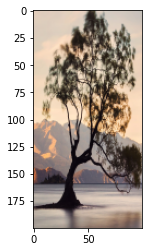

In [40]:
#check the axis for noticing the effect of image resize
#specifying exact size of output image
d_width = 100
d_height = 200
dim =(d_width, d_height)

resize_crop_img2 = cv2.resize(crop_img, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resize_crop_img2)

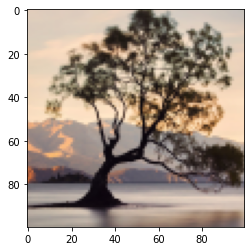

In [41]:
#Resize while maintaing the aspect ratio
d_width = 100
aspect_ratio = d_width/crop_img.shape[1]
d_height = int(crop_img.shape[0] * aspect_ratio)
dim = (d_width, d_height)
resize_crop_img3 = cv2.resize(crop_img, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resize_crop_img3)

Text(0.5, 1.0, 'Original Image')

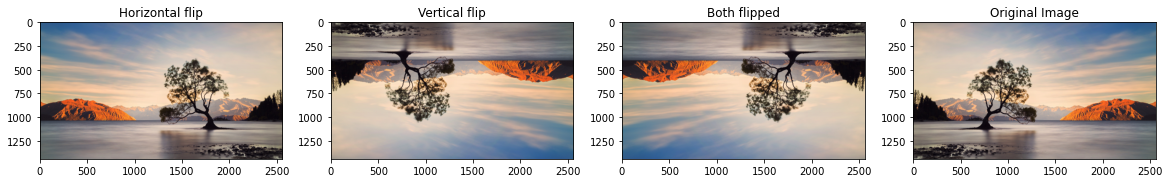

In [43]:
#Flipping the image
h_flip_img = cv2.flip(w_img_rgb, 1) #horizontal flip
v_flip_img = cv2.flip(w_img_rgb, 0) #vertical flip
d_flip_img = cv2.flip(w_img_rgb,-1) #flip in both directions

#show images
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h_flip_img);plt.title("Horizontal flip");
plt.subplot(142);plt.imshow(v_flip_img);plt.title("Vertical flip");
plt.subplot(143);plt.imshow(d_flip_img);plt.title("Both flipped");
plt.subplot(144);plt.imshow(w_img_rgb); plt.title("Original Image")
